# Home work 4

## Name: Ameya Dalvi   Email: abdalvi@iu.edu   Username: abdalvi

### Partner Name: Aditya Rudrawar

### All the work herein is solely mine

***

# Problem 1: Expectation-Maximization Algorithm for Clustering

- The expectation–maximization (EM) algorithm is an iterative approach for determining (local) maximum likelihood or maximum a posteriori (MAP) parameter estimates in statistical models with unobserved latent variables.
- The EM iteration alternates between an expectation (E) step that constructs a function for the expected log-likelihood assessed using the current estimate for the parameters and a maximization (M) phase that computes parameters that maximize the expected log-likelihood discovered on the E step.
- In the following E phase, these parameter estimates are utilized to calculate the distribution of the latent variables.
- For the EM algorithm, we sicuss the following points:

    1. **Initializing each Gaussian**:
       We initialized the Gaussians by randomly picking datapoints from the given dataset. For visualization purposes, below are 3 gausians which are created by considering 3 random points as the initial means and it's respective co-variances. This is for a 1-dimensional dataset.
       <div>
            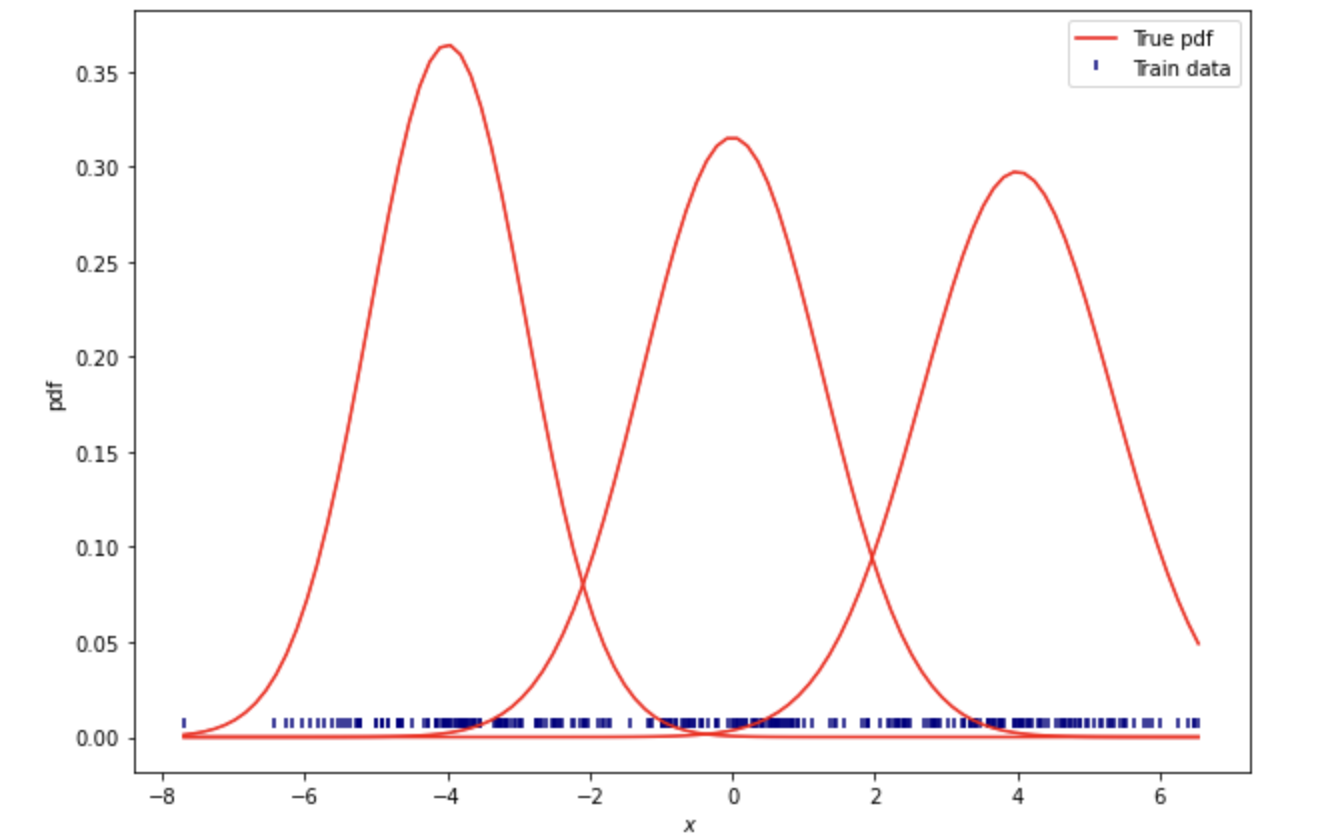
       </div>
       
    2. **Deciding Ties**:
       The ties or **likelihood** is calculated using the initialized means and co-variances, and for all the subsequent iterations the means an co-variances are updated in the maximization step.
       
    3. **Stopping Criteria**:
       For the stopping criteria, we define an epsillon value which stops the EM algorithm whenever it converges.
       
       ∑<sup>k</sup><sub>i=1</sub> || µ<sub>i</sub><sup>t</sup> - µ<sub>i</sub><sup>t-1</sup> ||<sup>2</sup>
       
       When the differnece of previous and current means is less than epsillon

In [ ]:
def em(data1,k,datalast):
  means = []
  cov = []
  priors = [1/k]*k 
  priors = np.array(priors)
  X =[]
  Xlast = []
  X = data1.values.tolist()
  d = len(X[0])
  Xlast = datalast.values.tolist()
  X = np.array(X)
  X = np.true_divide(X,1000)
  # print(X)
  eps=1e-5

  # og_mean =[]
  # for i in range()
  # print(X)

  # run GMM for 20 steps
  for i in range(k):
    random = np.random.randint(0, len(X))
    mean = X[random]
    cov1 = np.identity(d)
    means.append(mean)
    cov.append(cov1)
  t=0
  # old_means = copy.deepcopy(means)
  for step in range(50):
    old_means = means.copy()
    t=t+1
    posteriors = []
    # Expectation step
    for j in range(k):
      likelihood = np.array([multivariate_normal.pdf(X[i], mean = means[j], cov = cov[j], allow_singular = True) for i in range(len(X))])
      # print(likelihood)
      posterior = likelihood*priors[j]
      posteriors.append(posterior)
    posteriors = np.array(posteriors)
    posteriors_sums = np.sum(posteriors, axis=0)

    for j in range(len(X)):
      posteriors[:,j] /= posteriors_sums[j]

    # Maximization step 
    for i in range(k):
            sum_posteriors_i = np.sum(posteriors[i])
            means[i] = np.zeros(shape = d)
        
            for j in range(len(X)):
                means[i] += posteriors[i][j] * X[j]
            
            means[i] /= sum_posteriors_i  # re-estimate mean
            
    # print(f'\nRe-estimated Mean  (t = {t}): {means}')
        
    for i in range(k):
        cov[i] = np.zeros(shape = (d,d))
        
        for j in range(len(X)):
            cov[i] += posteriors[i][j] * (np.dot(X[j] - means[i], (X[j] - means[i]).T)) # Numerator
            
        cov[i] /= sum_posteriors_i # Re-estimated Covariance Matrices
    
    priors = np.average(posteriors, axis=1)
    
    # print(f'\nRe-estimated Priors (t = {t}): {priors}')
    # print("\nOriginal means's : ",old_means)
    # print("\nNew means's: ",means)


    diff = np.linalg.norm((np.array(means)-np.array(old_means)))

    print(diff)

    if diff <= eps:
      break
  return posteriors
    

***

# Problem 2: Analysis of the EM over Real-world Data Sets 

***

# Problem 3: Algorithm Design

## Problem 3.1:
- Make a hashmap with all of P's prefixes as keys and all of P's prefixes as values.
- Using sub string, keep track of the T substrings that are in P.
- Start two pointers, i and j, and start a while loop that will finish when i reaches the end of T, T is traversed  using i and j is used to keep track of which index - 1 - is reached. A prefix of P is a substring of T.
- The hashmap is then used to verify if any sub strings of T are identical to any prefixes of P whose default value is ""
- If a T substring that is a prefix of P exists, we check if it is larger than the previously recorded longest prefix substring, which has the default value of " " Then we set j equal to I indicating at which index the substring will appear.
- If a T substring that is a prefix of P exists, we check if it is larger than the previously recorded longest prefix substring, which has the default value of " " Then we set j equal to I indicating the position at which the substring, which is also a prefix, ends.
- If no such substring exists, the value of sub string is set to " ". Make I and j equal, making I the last index where a substring existed + 1, and then increase j by one. As a result, I go back and forth till I reach the finish.
- The time it takes to create the prefix dictionary is p, which is the length of Pattern P.
- When I exceeds len(T), the while loop terminates, and the value of I is decremented every time a substring isn't matched. Because we have to explain (d+p), this occurs when there is just one P prefix.

In [1]:
def get_prefix(P):
    ### Returns a dictioanry containing all the prefix of P as keys and the value as None. So that we can access them in O(1)
    dict = {}
    prefix = ""
    for i in range(len(P)):
        prefix = prefix + P[i]
        dict[prefix] = None
    return dict

def algorithm(T, P):
    prefix_dict =  get_prefix(P) # TC: O(P)
    i = 0
    j = 0
    sub_string = ""
    longest_prefix_substring = ""

    len_sub_string = 0
    len_longest_prefix_substring = 0
    while(i < len(T)): 
        
        if prefix_dict.__contains__(sub_string + T[i]):
            sub_string = sub_string + T[i]
            print(f'j:{j} , i:{i}, sub_string:{sub_string}')
            len_sub_string += 1
            if len_sub_string > len_longest_prefix_substring:
                longest_prefix_substring = sub_string
                len_longest_prefix_substring += 1
                j = i
        else:
            print(f'j:{j} , i:{i}, sub_string:{sub_string + T[i]}')
            sub_string = ""
            len_sub_string = 0
            i = j
            j += 1

        i += 1
    print("\n")  
    return longest_prefix_substring

print("The Best Case i.e. Ω(d+p) ")

P = 'pqrs'
T = 'ipsjdabcde'


print("Longest prefix of P that is available in T is: ", algorithm(T, P))


print("The Worst Case: ")

P = 'abcdef'
T = 'aababcabcdabcde'


print("Longest prefix of P that is available in T is: ", algorithm(T, P))

The Best Case i.e. Ω(d+p) 
j:0 , i:0, sub_string:i
j:1 , i:1, sub_string:p
j:1 , i:2, sub_string:ps
j:2 , i:2, sub_string:s
j:3 , i:3, sub_string:j
j:4 , i:4, sub_string:d
j:5 , i:5, sub_string:a
j:6 , i:6, sub_string:b
j:7 , i:7, sub_string:c
j:8 , i:8, sub_string:d
j:9 , i:9, sub_string:e


Longest prefix of P that is available in T is:  p
The Worst Case: 
j:0 , i:0, sub_string:a
j:0 , i:1, sub_string:aa
j:1 , i:1, sub_string:a
j:1 , i:2, sub_string:ab
j:2 , i:3, sub_string:aba
j:3 , i:3, sub_string:a
j:3 , i:4, sub_string:ab
j:3 , i:5, sub_string:abc
j:5 , i:6, sub_string:abca
j:6 , i:6, sub_string:a
j:6 , i:7, sub_string:ab
j:6 , i:8, sub_string:abc
j:6 , i:9, sub_string:abcd
j:9 , i:10, sub_string:abcda
j:10 , i:10, sub_string:a
j:10 , i:11, sub_string:ab
j:10 , i:12, sub_string:abc
j:10 , i:13, sub_string:abcd
j:10 , i:14, sub_string:abcde


Longest prefix of P that is available in T is:  abcde


## Problem 3.2:
1. We have three arrays X, Y, Z and we need to find x in X, y in Y, and z in Z, such that t = x+y+z.
2. We dont know if the arrays are sorted, so we are assuming the arrays as NOT sorted.
3. We need to find the algorithm with TC: O(m^2logm), the O(m^2) is achievable by using a nested for loop, the logm is the tricky part. To achieve this we insert the array Z in a Binary Tree. We know searching in a binary tree takes O(logm) time because we have to search through the height of the binary tree.
4. The creation of binary tree takes O(mlogm) time.
5. Now, we use a nested `for` loop finding to find the values of x, y that takes O(m^2) time and a search in the binary tree for finding the value of z, that takes O(logm) time.
6. So, the total time complexity of the algorithm is O(m^2logm + mlogm), where mlogm is the time required to create the binary tree of Z, and m^2logm is the time required to search the values of x, y, z such that t = x + y + z.
7. In Worst cases m^2logm >>>>> mlogm meaning in worst cases the time to find x,y,z is much much higher than the time to create the binary tree.

>So the time complexity comes out as O(m^2logm)


In [2]:
class Node:
    def __init__(self, data, left=None, right=None):
        self.data = data
        self.left = left
        self.right = right


class BinaryTree:
    def __init__(self, data):
        self.root = Node(data)
    
    def insert(self, data):
        self.insertIntoBT(self.root, data)
        return
    
    def insertIntoBT(self, node, data):
        if data <= node.data:
            if node.left != None:
                self.insertIntoBT(node.left, data)
            else:
                node.left = Node(data)
        
        if data > node.data:
            if node.right != None:
                self.insertIntoBT(node.right, data)
            else:
                node.right = Node(data)
                
    def contains(self, data):
        return self.containsInBT(self.root, data)
    
    def containsInBT(self, node, data):
        if node == None:
            return False
        if node.data == data:
            return True
        
        if self.containsInBT(node.left, data):
            return True
        if self.containsInBT(node.right, data):
            return True
        return False


def algorithm(X, Y, Z, t):
    
    found = False
    bt = BinaryTree(Z[0])

    for i in range(1, len(Z)): # O(mlogm)
        bt.insert(Z[i]) 

    
    for x in X: #O(m)
        for y in Y: #O(m)
            z = t - (x + y)
            if bt.contains(z): #O(logm)
                print(f'The numbers: {x} in X, {y} in Y, {z} in Z exists where x+y+z={t}')
                found = True

    if not found:
        print(f'x,y,z were not found such that {t} = x+y+z')
    
    print()
X = [5,2,4,3,1]
Y = [1,2,5,4,2]
Z = [5,4,1,2,3]

t = 13
print("X: ",X)
print("Y: ",Y)
print("Z: ",Z)
print("t: ", t)
algorithm(X,Y,Z,t)


X = [5,2,4,3,1]
Y = [1,2,5,4,2]
Z = [5,4,1,2,3]

t = 20
print("X: ",X)
print("Y: ",Y)
print("Z: ",Z)
print("t: ", t)
algorithm(X,Y,Z,t)

X:  [5, 2, 4, 3, 1]
Y:  [1, 2, 5, 4, 2]
Z:  [5, 4, 1, 2, 3]
t:  13
The numbers: 5 in X, 5 in Y, 3 in Z exists where x+y+z=13
The numbers: 5 in X, 4 in Y, 4 in Z exists where x+y+z=13
The numbers: 4 in X, 5 in Y, 4 in Z exists where x+y+z=13
The numbers: 4 in X, 4 in Y, 5 in Z exists where x+y+z=13
The numbers: 3 in X, 5 in Y, 5 in Z exists where x+y+z=13

X:  [5, 2, 4, 3, 1]
Y:  [1, 2, 5, 4, 2]
Z:  [5, 4, 1, 2, 3]
t:  20
x,y,z were not found such that 20 = x+y+z



## Problem 3.3:

The Basic idea of the algorithm, is
1. To first check if the Trie has the specified string or not. This will take a standard trie time i.e O(m), m is the length of the string.
2. If its not present, we simply return with the statement "Not Present"
3. If s is present in T, we need to check if the node at which s ends doesnot have any children, if the node has any children, that means the node is also used to access another string apart from s. If it doesnt have any children we move ahead with the algorithm. We check common words for every node  while deletion so that other strings should not be affected.
4. Since the deletion of nodes in trie moves from leaf nodes to root node, we would need to do the same in compressed trie as well.
5. We store the parent of the node where s was found, lets call the parent node "p" and the node at which s was found "n". We now know p, follow the order of leaf -> root. We delete n, since this is a compressed trie, we need to check if any changes to any node makes the number of children less than 2, if it does, we merge the child node to the parent node, that maintains the quality of Compressed Trie.
6. We return with("Successfully Deleted.") message, indicating the string s is deleted from T.

Time Complexity Analysis.

1. First we needed to check if s is present in T or not. That require O(m) time, where m is the length of the string.
2. Then we need to traverse to node "n" where s ends, this is will be O(m) time. The time to check if the node "n" has any children or not(indicating there is another string involved with the node "n") is O(1).
3. We know the parent, if a single brother exists of node "n", we merge it with parent p. This will take O(1) time.

So the total time complexity for deletion of a string s in T will take O(m + m) time, so O(m) time.


Best Case: O(1)
Worst Case: O(m) where m is the length of string s.